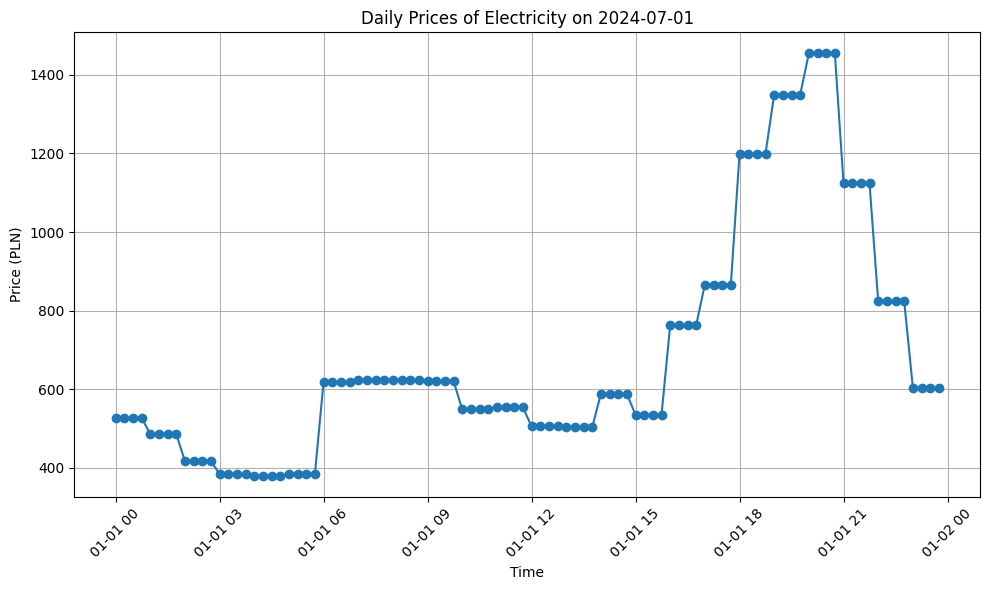

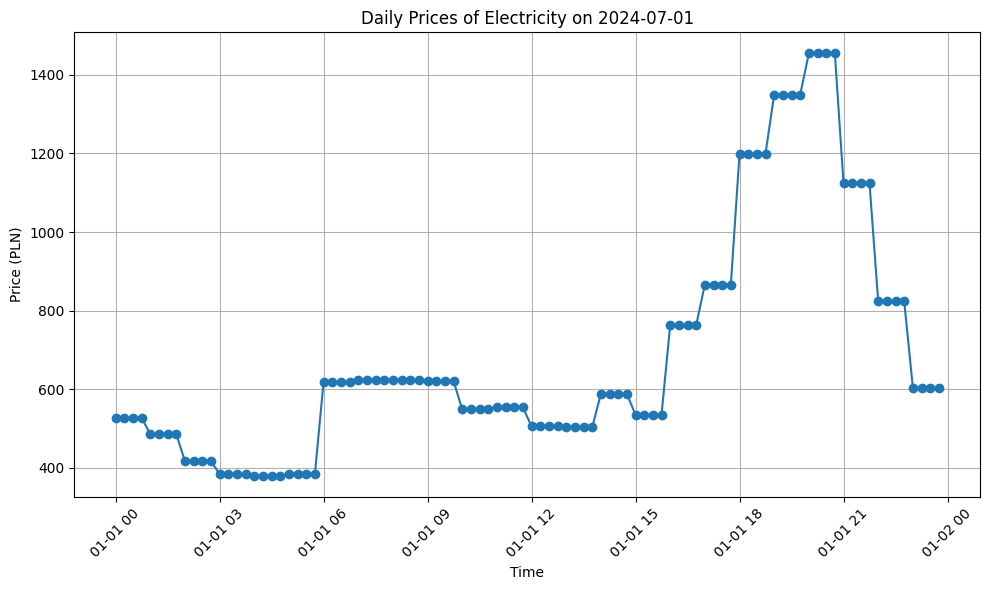

In [1]:
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Definiowanie URL i parametrów zapytania
url = "https://api.raporty.pse.pl/api/csdac-pln"
params = {
    "$filter": "business_date eq '2024-07-01'"
}

# Wykonanie zapytania GET do API
response = requests.get(url, params=params)

# Sprawdzenie statusu odpowiedzi
if response.status_code == 200:
    # Parsowanie odpowiedzi jako JSON
    data = response.json()
    prices = data['value']

    # Ekstrakcja danych do wykresu
    times = [entry['udtczas_oreb'].split(' - ')[0] for entry in prices]
    price_values = [entry['csdac_pln'] for entry in prices]

    # Konwersja czasu na format datetime dla osi x
    times = [datetime.strptime(time, "%H:%M") for time in times]

    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(times, price_values, marker='o', linestyle='-')
    plt.xlabel('Time')
    plt.ylabel('Price (PLN)')
    plt.title('Daily Prices of Electricity on 2024-07-01')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Błąd: {response.status_code}")

# Testowanie funkcji
if __name__ == "__main__":
    # Uruchomienie kodu w celu przetestowania
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            prices = data['value']

            # Ekstrakcja danych do wykresu
            times = [entry['udtczas_oreb'].split(' - ')[0] for entry in prices]
            price_values = [entry['csdac_pln'] for entry in prices]

            # Konwersja czasu na format datetime dla osi x
            times = [datetime.strptime(time, "%H:%M") for time in times]

            # Tworzenie wykresu
            plt.figure(figsize=(10, 6))
            plt.plot(times, price_values, marker='o', linestyle='-')
            plt.xlabel('Time')
            plt.ylabel('Price (PLN)')
            plt.title('Daily Prices of Electricity on 2024-07-01')
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Błąd: {response.status_code}")
    except Exception as e:
        print(f"Wystąpił błąd: {e}")
